<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Preprocesssing" data-toc-modified-id="Data-Loading-and-Preprocesssing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Preprocesssing</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Building-a-Profile-of-a-High-Risk-Customer" data-toc-modified-id="Building-a-Profile-of-a-High-Risk-Customer-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Building a Profile of a High-Risk Customer</a></span></li><li><span><a href="#Sources" data-toc-modified-id="Sources-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sources</a></span></li></ul></li></ul></div>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Preprocesssing

In [2]:
df = pd.read_excel("default_credit.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [6]:
df.isna().sum().sum()

0

In [7]:
df.rename(columns={"default payment next month":"default"}, inplace=True)

df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [8]:
preprocessed_df = df.copy()

In [9]:
## Unique values in each categorical columns

print("Sex", preprocessed_df.sex.unique())
print('Education', preprocessed_df.education.unique())
print('Pay_0', preprocessed_df.pay_0.unique())
print('Marriage', preprocessed_df.marriage.unique())
print('Default', preprocessed_df.default.unique())

Sex [2 1]
Education [2 1 3 5 4 6 0]
Pay_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage [1 2 3 0]
Default [1 0]


- The EDUCATION column has 7 unique values, but as per our data description, we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4

In [10]:
fill = (df.education == 0) | (df.education == 5) | (df.education == 6)
preprocessed_df.loc[fill, 'education'] = 4
df.loc[fill, 'education'] = 4

In [11]:
## marriage column also has 4 unique values but according to our data we only have three categories

fill = (df.marriage == 0)
preprocessed_df.loc[fill, 'marriage'] = 2
df.loc[fill, 'marriage'] = 2

In [12]:
preprocessed_df = preprocessed_df.rename(columns={'pay_0': 'pay_1'})
preprocessed_df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# EDA

## Univariate Analysis

In [13]:
## Map categorical data

preprocessed_df.sex = preprocessed_df.sex.map({1:'Male', 2:'Female'})
preprocessed_df.default = preprocessed_df.default.map({0:'No', 1:'Yes'})

preprocessed_df.education = preprocessed_df.education.map({1:'Graduate School',
                                                          2:'University',
                                                          3:'High School',
                                                          4:'Others'})

preprocessed_df.marriage = preprocessed_df.marriage.map({1:'Married',
                                                        2:'Single',
                                                        3:'Divorced'})

In [22]:
def plot_categorical_count(df, col, hue=None, hue_order=None, is_pct=True, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), va='bottom', ha='center', size=14)
        
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)
    
    plt.show()
    
    if is_pct:
        print()
        print("Percentage share of each category:")
        print(df[col].value_counts(normalize=True)*100)

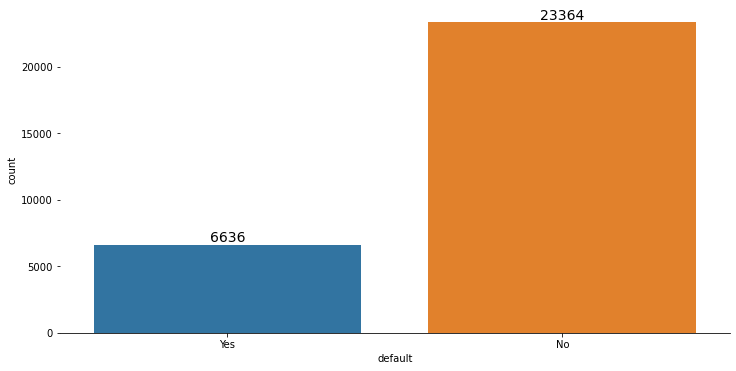


Percentage share of each category:
No     77.88
Yes    22.12
Name: default, dtype: float64


In [17]:
plot_categorical_count(preprocessed_df, 'default')

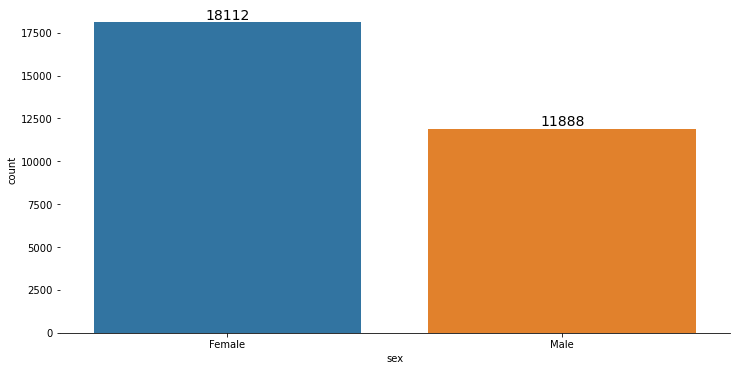


Percentage share of each category:
Female    60.373333
Male      39.626667
Name: sex, dtype: float64


In [18]:
plot_categorical_count(preprocessed_df, 'sex')

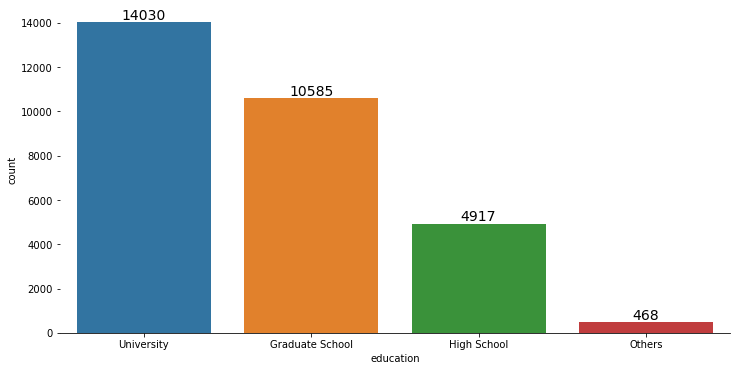


Percentage share of each category:
University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: education, dtype: float64


In [19]:
plot_categorical_count(preprocessed_df, 'education')

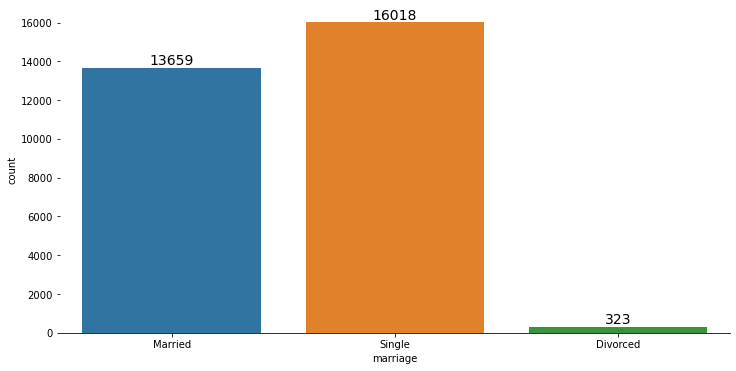


Percentage share of each category:
Single      53.393333
Married     45.530000
Divorced     1.076667
Name: marriage, dtype: float64


In [20]:
plot_categorical_count(preprocessed_df, 'marriage')

## Bivariate Analysis

In [44]:
def default_df(df, col):
    df1 = pd.crosstab(index=df[col], columns=df.default, margins=True)
    df1.rename(columns={'No':'total_no_default', 'Yes':'total_yes_default', 'All':'total_default'}, inplace=True)
    
    df2 = pd.crosstab(index=df[col], columns=df.default, normalize='index', margins=True)
    df2.rename(columns={'No':'pct_no_default', 'Yes':'pct_yes_default'}, inplace=True)
    
    final_df = pd.concat([df1, df2], axis=1)
    
    return final_df

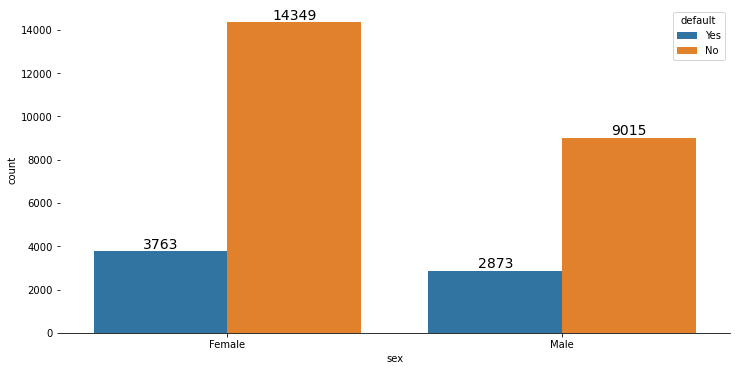

In [23]:
plot_categorical_count(preprocessed_df, col='sex', hue='default', is_pct=False)

In [50]:
default_df(preprocessed_df, 'sex')

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default
sex,,,,,
Female,14349,3763,18112,0.792237,0.207763
Male,9015,2873,11888,0.758328,0.241672
All,23364,6636,30000,0.778800,0.221200


- around 24% of male customers have defaulted and around 20% of female customers have defaulted.

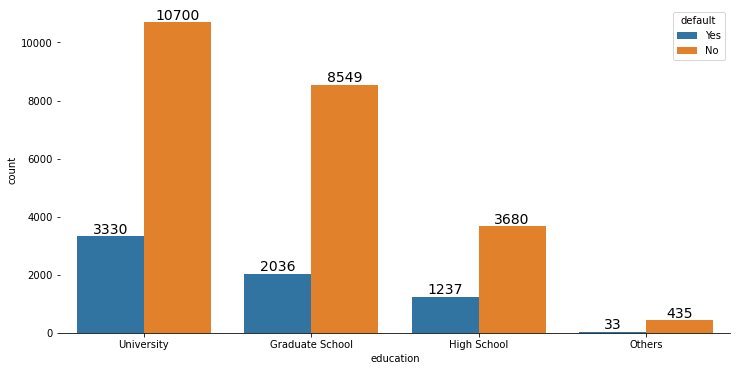

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default
education,,,,,
Graduate School,8549,2036,10585,0.807652,0.192348
High School,3680,1237,4917,0.748424,0.251576
Others,435,33,468,0.929487,0.070513
University,10700,3330,14030,0.762651,0.237349
All,23364,6636,30000,0.778800,0.221200


In [53]:
plot_categorical_count(preprocessed_df, col='education', hue='default', is_pct=False)

default_df(preprocessed_df, 'education')

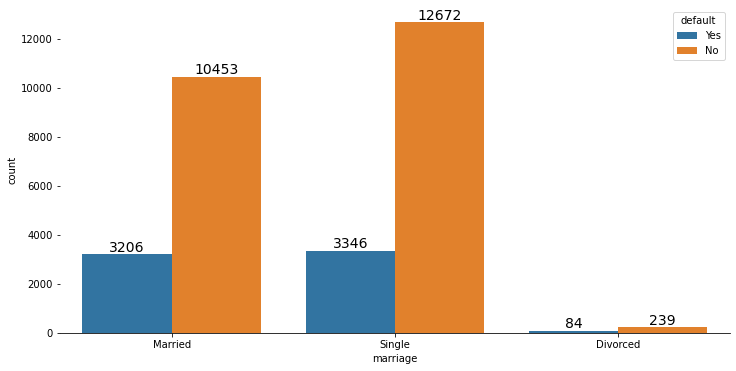

default,total_no_default,total_yes_default,total_default,pct_no_default,pct_yes_default
marriage,,,,,
Divorced,239,84,323,0.739938,0.260062
Married,10453,3206,13659,0.765283,0.234717
Single,12672,3346,16018,0.791110,0.208890
All,23364,6636,30000,0.778800,0.221200


In [54]:
plot_categorical_count(preprocessed_df, col='marriage', hue='default', is_pct=False)

default_df(preprocessed_df, 'marriage')

In [56]:
pd.crosstab(preprocessed_df.pay_1, preprocessed_df.default, margins=True)

default,No,Yes,All
pay_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


- we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.

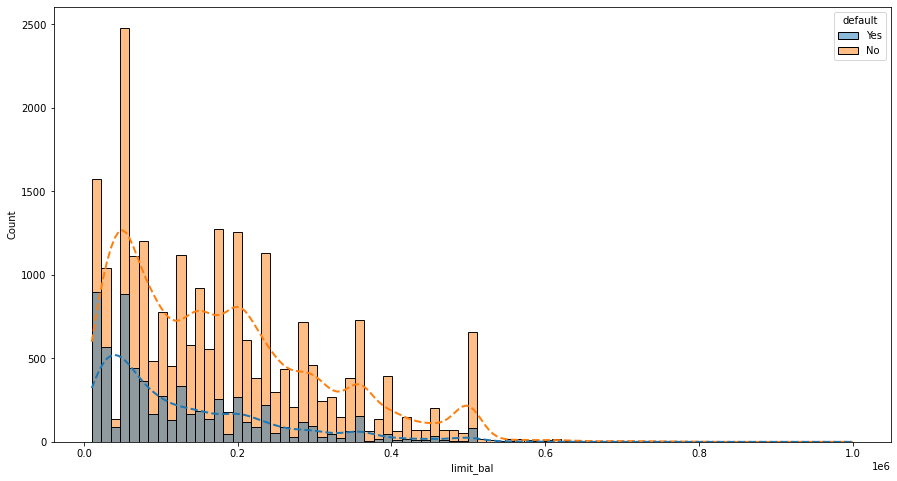

In [77]:
## Balance Limit

sns.histplot(data=preprocessed_df, x='limit_bal', hue='default', 
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

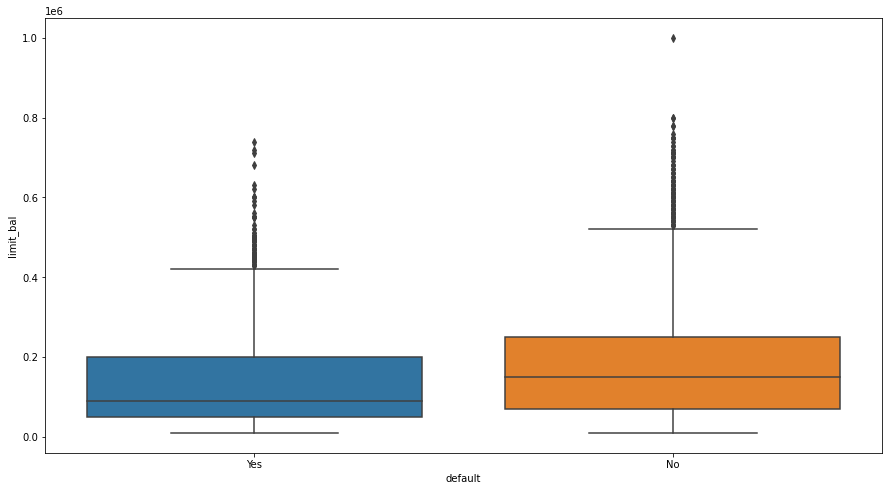

In [78]:
sns.boxplot(data=preprocessed_df, x='default', y='limit_bal')
plt.show()

In [79]:
df.groupby('default')['limit_bal'].agg(['mean', 'median', 'std'])

,mean,median,std
default,,,
0,178099.726074,150000.0,131628.359660
1,130109.656420,90000.0,115378.540571


In [80]:
## hypothesis test to check whether average balance for dafaulters and non-defaulters are same

res = stats.ttest_ind(preprocessed_df.limit_bal.loc[preprocessed_df.default=='Yes'], 
                preprocessed_df.limit_bal.loc[preprocessed_df.default=='No'])

print(f"P-Value: {res[1]:.3f}")

P-Value: 0.000


- we can infer that customers with higher balances have a lower likelihood of default than customers with lower balance amounts.

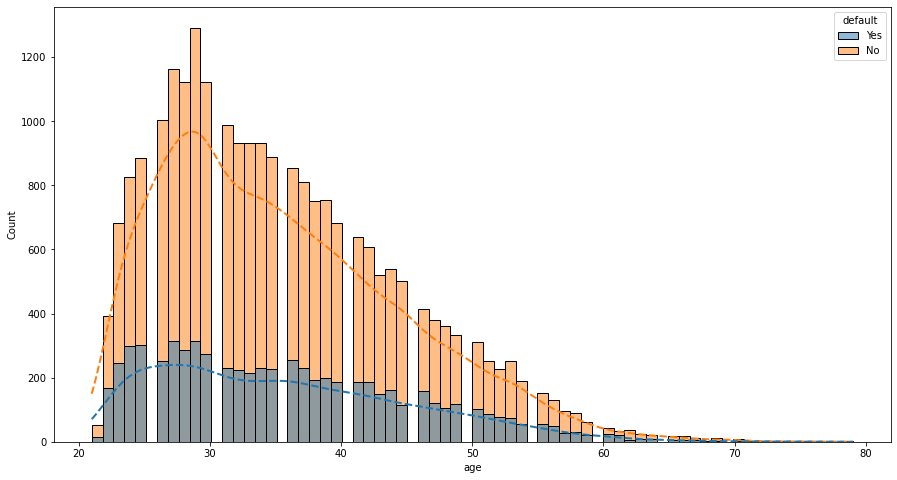

In [81]:
## Age 

sns.histplot(data=preprocessed_df, x='age', hue='default', 
            kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

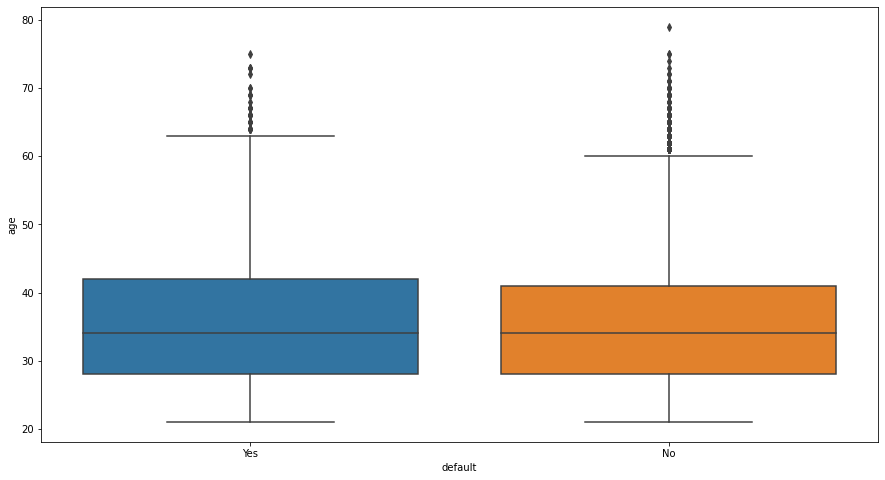

In [82]:
sns.boxplot(data=preprocessed_df, x='default', y='age')
plt.show()

In [83]:
## hypothesis test to check whether average age for dafaulters and non-defaulters are same

res = stats.ttest_ind(preprocessed_df.age.loc[preprocessed_df.default=='Yes'], 
                preprocessed_df.age.loc[preprocessed_df.default=='No'])

print(f"P-Value: {res[1]:.3f}")

P-Value: 0.016


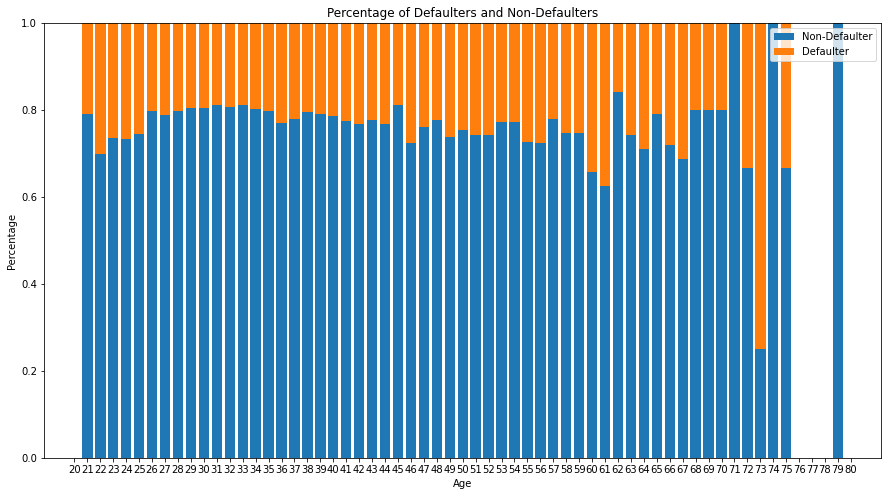

In [93]:
age_df = pd.crosstab(preprocessed_df.age, preprocessed_df.default, normalize='index')

plt.bar(x=age_df.index, height=age_df.No, label='Non-Defaulter')
plt.bar(x=age_df.index, height=age_df.Yes, bottom=age_df.No, label='Defaulter')

plt.xticks(ticks=range(20,81))
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title("Percentage of Defaulters and Non-Defaulters")

plt.legend()
plt.show()

In [111]:
## Pay delays

def display_pay_delays(df, col):
    x = pd.crosstab(index=df[col], columns=df.default, normalize='index')
    x = x.style.highlight_max(color='orange', axis=1)
    return x

In [114]:
#  repayment status in September

display_pay_delays(preprocessed_df, 'pay_1')

default,No,Yes
pay_1,,
-2,0.867706,0.132294
-1,0.832219,0.167781
0,0.871887,0.128113
1,0.660521,0.339479
2,0.308586,0.691414
3,0.242236,0.757764
4,0.315789,0.684211
5,0.500000,0.500000
6,0.454545,0.545455


In [116]:
#  repayment status in August

display_pay_delays(preprocessed_df, 'pay_2')

default,No,Yes
pay_2,,
-2,0.817292,0.182708
-1,0.840331,0.159669
0,0.840877,0.159123
1,0.821429,0.178571
2,0.443850,0.556150
3,0.383436,0.616564
4,0.494949,0.505051
5,0.400000,0.600000
6,0.250000,0.750000


In [117]:
#  repayment status in July

display_pay_delays(preprocessed_df, 'pay_3')

default,No,Yes
pay_3,,
-2,0.814688,0.185312
-1,0.844055,0.155945
0,0.825488,0.174512
1,0.750000,0.250000
2,0.484420,0.515580
3,0.425000,0.575000
4,0.421053,0.578947
5,0.428571,0.571429
6,0.391304,0.608696


In [121]:
## pay amount in September

preprocessed_df.groupby('default')['pay_amt1'].agg(['min', 'max', 'mean', 'median', 'std']).T

default,No,Yes
min,0.000000,0.000000
max,873552.000000,300000.000000
mean,6307.337357,3397.044153
median,2459.500000,1636.000000
std,18014.508990,9544.252427


- People with high pay amount in month September are less likely to default than people with less pay amount.

## Correlation

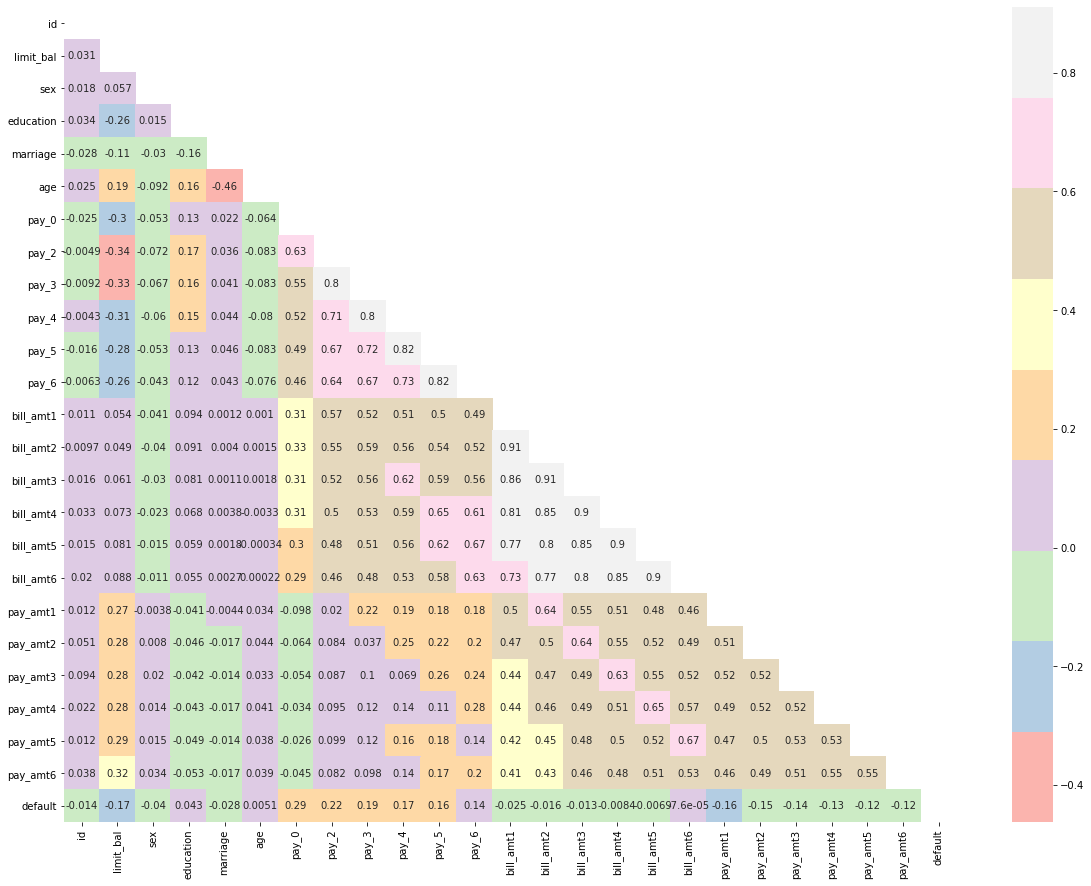

In [137]:
corr_matrix = df.corr(method='spearman')


plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

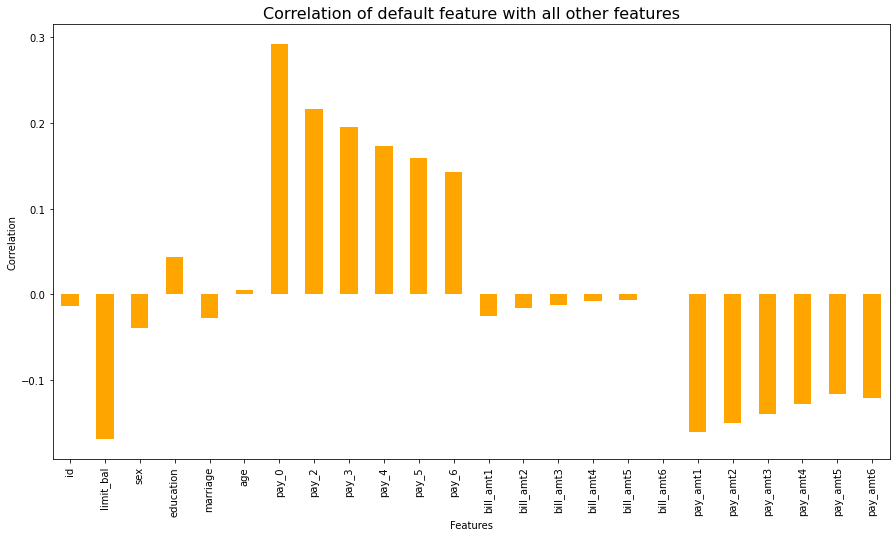

In [138]:
corr_matrix.iloc[:-1, -1].plot.bar(color='orange')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation of default feature with all other features", fontdict={'size':16})
plt.show()

## Building a Profile of a High-Risk Customer

- A male customer is more likely to default than a female customer.
- People with a relationship status of other are more likely to default than married or single people.
- A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.
- A customer who has delayed payment for 2 consecutive months has a higher probability of default.
- A customer who is 22 years of age has a higher probability of defaulting on payments than any other age group.

## Sources

- Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.
- Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
- [Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)